# **Testing Bell´s Inequality with Qiskit on a Simulated Ideal Quantum Computer**

In [ ]:
!pip install qiskit
!pip install pylatexenc

The key point to test Bell´s inequality on a quantum computer is to understand how to perform measurements in an arbitrary basis oriented with any angles $\theta$ y $\phi$.

Given the two orthogonal quantum states 

$$
|\psi\rangle = \cos({\frac{\theta}{2}})|0\rangle +e^{i\phi} \sin({\frac{\theta}{2}})|1\rangle=\begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} 
$$

and

$$
|\psi^{'}\rangle =\cos({\frac{\pi-\theta}{2}})|0\rangle +e^{i(\pi+\phi)} \sin({\frac{\pi-\theta}{2}})|1\rangle=\begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix} 
$$

which correspond to "spin up" and "spin down", along the direction 

$$\hat{n} = \hat{i} sin\theta cos\phi  + \hat{j} sin\theta sin\phi + \hat{k} cos \theta,$$


the rotation unitary operators 


$$R_Y(\theta) = \exp\left(-i \frac{\theta}{2} Y\right) =
    \begin{pmatrix}
        \cos{\frac{\theta}{2}} & -\sin{\frac{\theta}{2}} \\
        \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
$$

and

$$R_Z(\phi) = \exp\left(-i \frac{\phi}{2} Z\right) =
    \begin{pmatrix}
        e^{-i\phi/2} & 0 \\
       0 & e^{i\phi/2}
    \end{pmatrix}
$$



transform the basis  $\{|\psi\rangle, |\psi^{'}\rangle\}$ into the computational basis 
$\{|0\rangle, |1\rangle\}$ (up to a global phase factor which has no observable effects)
$$
R_Y(-\theta) R_Z(-\phi)|\psi\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \cos({\frac{\theta}{2}}) \\\\ e^{i\phi}\sin({\frac{\theta}{2}}) \end{pmatrix} =e^{i\phi/2}
    \begin{pmatrix} 1 \\\\ 0 \end{pmatrix}
    =e^{i\phi/2}|0\rangle
$$
$$
R_Y(-\theta) R_Z(-\phi)|\psi^{'}\rangle =\begin{pmatrix}
        \cos{\frac{\theta}{2}} & \sin{\frac{\theta}{2}} \\
        -\sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}}
    \end{pmatrix}
    \begin{pmatrix}
        e^{i\phi/2} & 0 \\
       0 & e^{-i\phi/2}
    \end{pmatrix}
    \begin{pmatrix} \sin({\frac{\theta}{2}}) \\\\ -e^{i\phi}\cos({\frac{\theta}{2}}) \end{pmatrix}  =e^{i\phi/2}
    \begin{pmatrix} 0 \\\\ 1 \end{pmatrix}
    =e^{i\phi/2}|1\rangle
$$

In order to measure a qubit in the basis $\{|\psi\rangle, |\psi^{'}\rangle\}$ we just need to apply $R_Y(-\theta) R_Z(-\phi)$ to that qubit just before measuring it on the Qiskit computational basis  $\{|0\rangle, |1\rangle\}$.

Using this mathematical tool we can program the code of Bell's inequality on a quantum computer using Qiskit.

First we prepare the singlet Bell state, which has a total spin equal to zero, 

$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle  |1\rangle - |1\rangle  |0\rangle)
$$

with the following Qiskit circuit:

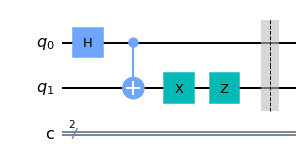

In [2]:
from qiskit import QuantumCircuit, Aer
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2,2) 
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.draw("mpl")

We check that the quantum state at the barrier is indeed 

$$
|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|0\rangle  |1\rangle - |1\rangle  |0\rangle)
$$

In [3]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

The Qiskit code to perform each of the 9 experiments with the measurements of the states of the 2 qubits along each of the 3 directions with 

$\theta = 0$, $\theta = \frac{2\pi}{3}$ and $\theta = \frac{4\pi}{3}$ on the XZ plane is the following:

In [4]:
backend = Aer.get_backend('qasm_simulator')
shots = 1000
N_corr = 0
N_anticorr = 0
qc3 = QuantumCircuit(2, 2)
qc3.measure(0,0)
qc3.measure(1,1)
print("                       Experiment A1B1")
qc11=qc
qc11=qc.compose(qc3)
print(qc11)
job11 = backend.run(qc11, shots=shots)
print("Results :",job11.result().get_counts())
if job11.result().get_counts().get('11') is not None:
  N_corr += job11.result().get_counts()['11']
if job11.result().get_counts().get('00') is not None:
  N_corr += job11.result().get_counts()['00']
N_anticorr += job11.result().get_counts()['01']+job11.result().get_counts()['10']

print("\n                       Experiment A1B2")
qc12 = QuantumCircuit(2, 2)
qc12.rz(0,1)
qc12.ry(-2*np.pi/3,1)
qc12.barrier()
qc12=qc.compose(qc12)
qc12=qc12.compose(qc3)
print(qc12)
job12 = backend.run(qc12, shots=shots)
print("Results :",job12.result().get_counts(qc12))
N_corr += job12.result().get_counts()['11']+job12.result().get_counts()['00']
N_anticorr += job12.result().get_counts()['01']+job12.result().get_counts()['10']

print("\n                       Experiment A1B3")
qc13 = QuantumCircuit(2, 2)
qc13.rz(-np.pi,1)
qc13.ry(-2*np.pi/3,1)
qc13.barrier()
qc13=qc.compose(qc13)
qc13=qc13.compose(qc3)
print(qc13)
job13 = backend.run(qc13, shots=shots)
print("Results :",job13.result().get_counts(qc13))
N_corr += job13.result().get_counts()['11']+job13.result().get_counts()['00']
N_anticorr += job13.result().get_counts()['01']+job13.result().get_counts()['10']

print("\n                       Experiment A2B1")
qc21 = QuantumCircuit(2, 2)
qc21.rz(0,0)
qc21.ry(-2*np.pi/3,0)
qc21.barrier()
qc21=qc.compose(qc21)
qc21=qc21.compose(qc3)
print(qc21)
job21 = backend.run(qc21, shots=shots)
print("Results :",job21.result().get_counts())
N_corr += job21.result().get_counts()['11']+job21.result().get_counts()['00']
N_anticorr += job21.result().get_counts()['01']+job21.result().get_counts()['10']

print("\n                        Experiment A2B2")
qc22 = QuantumCircuit(2, 2)
qc22.rz(0,0)
qc22.ry(-2*np.pi/3,0)
qc22.rz(0,1)
qc22.ry(-2*np.pi/3,1)
qc22.barrier()
qc22=qc.compose(qc22)
qc22=qc22.compose(qc3)
print(qc22)
job22 = backend.run(qc22, shots=shots)
print("Results :",job22.result().get_counts())
if job22.result().get_counts().get('11') is not None:
  N_corr += job22.result().get_counts()['11']
if job22.result().get_counts().get('00') is not None:
  N_corr += job22.result().get_counts()['00']
N_anticorr += job22.result().get_counts()['01']+job22.result().get_counts()['10']

print("\n                        Experiment A2B3")
qc23 = QuantumCircuit(2, 2)
qc23.rz(0,0)
qc23.ry(-2*np.pi/3,0)
qc23.rz(-np.pi,1)
qc23.ry(-2*np.pi/3,1)
qc23.barrier()
qc23=qc.compose(qc23)
qc23=qc23.compose(qc3)
print(qc23)
job23 = backend.run(qc23, shots=shots)
print("Results :",job23.result().get_counts())
N_corr += job23.result().get_counts()['11']+job23.result().get_counts()['00']
N_anticorr += job23.result().get_counts()['01']+job23.result().get_counts()['10']

print("\n                        Experiment A3B1")
qc31 = QuantumCircuit(2, 2)
qc31.rz(-np.pi,0)
qc31.ry(-2*np.pi/3,0)
qc31.barrier()
qc31=qc.compose(qc31)
qc31=qc31.compose(qc3)
print(qc31)
job31 = backend.run(qc31, shots=shots)
print("Results :",job31.result().get_counts())
N_corr += job31.result().get_counts()['11']+job31.result().get_counts()['00']
N_anticorr += job31.result().get_counts()['01']+job31.result().get_counts()['10']

print("\n                        Experiment A3B2")
qc32 = QuantumCircuit(2, 2)
qc32.rz(-np.pi,0)
qc32.ry(-2*np.pi/3,0)
qc32.rz(0,1)
qc32.ry(-2*np.pi/3,1)
qc32.barrier()
qc32=qc.compose(qc32)
qc32=qc32.compose(qc3)
print(qc32)
job32 = backend.run(qc32, shots=shots)
print("Results :",job32.result().get_counts())
N_corr += job32.result().get_counts()['11']+job32.result().get_counts()['00']
N_anticorr += job32.result().get_counts()['01']+job32.result().get_counts()['10']

print("\n                        Experiment A3B3")
qc33 = QuantumCircuit(2, 2)
qc33.rz(-np.pi,0)
qc33.ry(-2*np.pi/3,0)
qc33.rz(-np.pi,1)
qc33.ry(-2*np.pi/3,1)
qc33.barrier()
qc33=qc.compose(qc33)
qc33=qc33.compose(qc3)
print(qc33)
job33 = backend.run(qc33, shots=shots)
print("Results :",job33.result().get_counts())
if job33.result().get_counts().get('11') is not None:
  N_corr += job33.result().get_counts()['11']
if job33.result().get_counts().get('00') is not None:
  N_corr += job33.result().get_counts()['00']
N_anticorr += job33.result().get_counts()['01']+job33.result().get_counts()['10']
print("\nOut of a total of",9*shots,"measurements, we obtained")
print("Total correlated measurements:", N_corr)
print("Total anti-correlated measurements:", N_anticorr," corresponding to ",np.round(100*N_anticorr/(9*shots),2),"%")

                       Experiment A1B1
     ┌───┐                ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░──╫─┤M├
          └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1 
Results : {'01': 488, '10': 512}

                       Experiment A1B2
     ┌───┐                ░                        ░ ┌─┐   
q_0: ┤ H ├──■─────────────░────────────────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ┌───────┐┌───────────┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─┤ Rz(0) ├┤ Ry(-2π/3) ├─░──╫─┤M├
          └───┘└───┘└───┘ ░ └───────┘└───────────┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════╩══╩═
                                                      0  1 
Results : {'01': 134, '11': 366, '10': 134, '00': 366}

                       Experiment A1B3
     ┌───┐                ░                         ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─────────────────────────░─┤M├───
     └

# **Testing Bell´s Inequality with Qiskit on a Simulated Noisy Quantum Computer**


First we need to register to obtain a token

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('token') # your token goes here

We can get a list of the available quantum computers with

In [6]:
from qiskit import IBMQ
IBMQ.load_account() # Load account from disk
print(IBMQ.providers())    # List all available providers
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

We can add a noise model obtained from a real quantum computer from the IBM Quantum Experience, for example with
```
IBMQ.save_account('IBMQ-password')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
```

In [7]:
from qiskit import IBMQ, Aer
from qiskit_aer.noise import NoiseModel
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
noise_model = NoiseModel.from_backend(backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

ibmqfactory.load_account:WARNING:2023-02-21 00:47:56,121: Credentials are already in use. The existing account in the session will be replaced.


----------Noise Model for ibmq_manila --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['reset', 'sx', 'x', 'id', 'cx', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


or we can select the least busy quantum computer with the following code:

In [11]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

ibmqfactory.load_account:WARNING:2023-02-21 00:50:51,904: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_lima
----------Noise Model for ibmq_lima --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['reset', 'sx', 'x', 'id', 'cx', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


The following code adds the noise model taken from the chosen backend to the
simulation

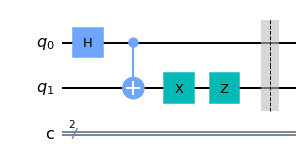

In [12]:
from qiskit import QuantumCircuit, Aer
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.draw("mpl")

In [13]:
stv.draw('latex', prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

In [16]:
from qiskit_aer import AerSimulator
from qiskit import IBMQ, transpile
backend = AerSimulator.from_backend(backend)
shots = 1000
N_corr = 0
N_anticorr = 0
qc3 = QuantumCircuit(2, 2)
qc3.measure(0,0)
qc3.measure(1,1)
print("                       Experiment A1B1")
qc11=qc
qc11=qc.compose(qc3)
print(qc11)
tqc11 = transpile(qc11, backend, optimization_level=3)
job11 = backend.run(tqc11,shots =shots)
print("Results :",job11.result().get_counts())
if job11.result().get_counts().get('11') is not None:
  N_corr += job11.result().get_counts()['11']
if job11.result().get_counts().get('00') is not None:
  N_corr += job11.result().get_counts()['00']
N_anticorr += job11.result().get_counts()['01']+job11.result().get_counts()['10']

print("\n                       Experiment A1B2")
qc12 = QuantumCircuit(2, 2)
qc12.rz(0,1)
qc12.ry(-2*np.pi/3,1)
qc12.barrier()
qc12=qc.compose(qc12)
qc12=qc12.compose(qc3)
print(qc12)
tqc12 = transpile(qc12, backend, optimization_level=3)
job12 = backend.run(tqc12,shots =shots)
print("Results :",job12.result().get_counts())
N_corr += job12.result().get_counts()['11']+job12.result().get_counts()['00']
N_anticorr += job12.result().get_counts()['01']+job12.result().get_counts()['10']

print("\n                       Experiment A1B3")
qc13 = QuantumCircuit(2, 2)
qc13.rz(-np.pi,1)
qc13.ry(-2*np.pi/3,1)
qc13.barrier()
qc13=qc.compose(qc13)
qc13=qc13.compose(qc3)
print(qc13)
tqc13 = transpile(qc13, backend, optimization_level=3)
job13 = backend.run(tqc13,shots =shots)
print("Results :",job13.result().get_counts())
N_corr += job13.result().get_counts()['11']+job13.result().get_counts()['00']
N_anticorr += job13.result().get_counts()['01']+job13.result().get_counts()['10']

print("\n                       Experiment A2B1")
qc21 = QuantumCircuit(2, 2)
qc21.rz(0,0)
qc21.ry(-2*np.pi/3,0)
qc21.barrier()
qc21=qc.compose(qc21)
qc21=qc21.compose(qc3)
print(qc21)
tqc21 = transpile(qc21, backend, optimization_level=3)
job21 = backend.run(tqc21,shots =shots)
print("Results :",job21.result().get_counts())
N_corr += job21.result().get_counts()['11']+job21.result().get_counts()['00']
N_anticorr += job21.result().get_counts()['01']+job21.result().get_counts()['10']

print("\n                        Experiment A2B2")
qc22 = QuantumCircuit(2, 2)
qc22.rz(0,0)
qc22.ry(-2*np.pi/3,0)
qc22.rz(0,1)
qc22.ry(-2*np.pi/3,1)
qc22.barrier()
qc22=qc.compose(qc22)
qc22=qc22.compose(qc3)
print(qc22)
tqc22 = transpile(qc22, backend, optimization_level=3)
job22 = backend.run(tqc22,shots =shots)
print("Results :",job22.result().get_counts())
if job22.result().get_counts().get('11') is not None:
  N_corr += job22.result().get_counts()['11']
if job22.result().get_counts().get('00') is not None:
  N_corr += job22.result().get_counts()['00']
N_anticorr += job22.result().get_counts()['01']+job22.result().get_counts()['10']

print("\n                        Experiment A2B3")
qc23 = QuantumCircuit(2, 2)
qc23.rz(0,0)
qc23.ry(-2*np.pi/3,0)
qc23.rz(-np.pi,1)
qc23.ry(-2*np.pi/3,1)
qc23.barrier()
qc23=qc.compose(qc23)
qc23=qc23.compose(qc3)
print(qc23)
tqc23 = transpile(qc23, backend, optimization_level=3)
job23 = backend.run(tqc23,shots =shots)
print("Results :",job23.result().get_counts())
N_corr += job23.result().get_counts()['11']+job23.result().get_counts()['00']
N_anticorr += job23.result().get_counts()['01']+job23.result().get_counts()['10']

print("\n                        Experiment A3B1")
qc31 = QuantumCircuit(2, 2)
qc31.rz(-np.pi,0)
qc31.ry(-2*np.pi/3,0)
qc31.barrier()
qc31=qc.compose(qc31)
qc31=qc31.compose(qc3)
print(qc31)
tqc31 = transpile(qc31, backend, optimization_level=3)
job31 = backend.run(tqc31,shots =shots)
print("Results :",job31.result().get_counts())
N_corr += job31.result().get_counts()['11']+job31.result().get_counts()['00']
N_anticorr += job31.result().get_counts()['01']+job31.result().get_counts()['10']

print("\n                        Experiment A3B2")
qc32 = QuantumCircuit(2, 2)
qc32.rz(-np.pi,0)
qc32.ry(-2*np.pi/3,0)
qc32.rz(0,1)
qc32.ry(-2*np.pi/3,1)
qc32.barrier()
qc32=qc.compose(qc32)
qc32=qc32.compose(qc3)
print(qc32)
tqc32 = transpile(qc32, backend, optimization_level=3)
job32 = backend.run(tqc32,shots =shots)
print("Results :",job32.result().get_counts(qc32))
N_corr += job32.result().get_counts()['11']+job32.result().get_counts()['00']
N_anticorr += job32.result().get_counts()['01']+job32.result().get_counts()['10']

print("\n                        Experiment A3B3")
qc33 = QuantumCircuit(2, 2)
qc33.rz(-np.pi,0)
qc33.ry(-2*np.pi/3,0)
qc33.rz(-np.pi,1)
qc33.ry(-2*np.pi/3,1)
qc33.barrier()
qc33=qc.compose(qc33)
qc33=qc33.compose(qc3)
print(qc33)
tqc33 = transpile(qc33, backend, optimization_level=3)
job33 = backend.run(tqc33,shots =shots)
print("Results :",job33.result().get_counts(qc33))
if job33.result().get_counts().get('11') is not None:
  N_corr += job33.result().get_counts()['11']
if job33.result().get_counts().get('00') is not None:
  N_corr += job33.result().get_counts()['00']
N_anticorr += job33.result().get_counts()['01']+job33.result().get_counts()['10']
print("\nOut of a total of",9*shots,"measurements, we obtained")
print("Total correlated measurements:", N_corr)
print("Total anti-correlated measurements:", N_anticorr," corresponding to ",np.round(100*N_anticorr/(9*shots),2),"%")

                       Experiment A1B1
     ┌───┐                ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░──╫─┤M├
          └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1 
Results : {'11': 12, '00': 39, '10': 495, '01': 454}

                       Experiment A1B2
     ┌───┐                ░                        ░ ┌─┐   
q_0: ┤ H ├──■─────────────░────────────────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ┌───────┐┌───────────┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─┤ Rz(0) ├┤ Ry(-2π/3) ├─░──╫─┤M├
          └───┘└───┘└───┘ ░ └───────┘└───────────┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════╩══╩═
                                                      0  1 
Results : {'11': 366, '01': 154, '00': 359, '10': 121}

                       Experiment A1B3
     ┌───┐                ░                         ░ ┌─┐   
q_0: ┤ H ├──■─────────────░────────────────────

# **Testing Bell´s Inequality with Qiskit on a Real Quantum Computer**

We can select a specific real quantum computer from the IBM Quantum Experience, for example with
```
IBMQ.save_account('IBMQ-password')
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
```

In [17]:
from qiskit import IBMQ, Aer
from qiskit_aer.noise import NoiseModel
#IBMQ.save_account('your-IBMQ-password')

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_manila')
noise_model = NoiseModel.from_backend(backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

ibmqfactory.load_account:WARNING:2023-02-21 00:54:13,655: Credentials are already in use. The existing account in the session will be replaced.


----------Noise Model for ibmq_manila --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['reset', 'sx', 'x', 'id', 'cx', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


or we can get the least busy quantum computer with the following code:

In [18]:
from qiskit import QuantumCircuit, Aer,execute
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)
print("----------Noise Model for",backend,"--------------\n",noise_model)

ibmqfactory.load_account:WARNING:2023-02-21 00:54:25,348: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_lima
----------Noise Model for ibmq_lima --------------
 NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['reset', 'sx', 'x', 'id', 'cx', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (4, 3)), ('cx', (3, 4)), ('cx', (2, 3)), ('cx', (3, 2)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('reset', (0,)), ('reset', (1,)), ('reset', (2,)), ('reset', (3,)), ('reset', (4,)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]



The base circuit is

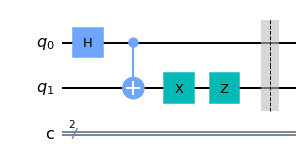

In [19]:
from qiskit import QuantumCircuit, Aer
import qiskit.quantum_info as qi
import numpy as np
qc = QuantumCircuit(2,2) # Ponemos 2 qubits y 2 bits
qc.h(0) 
qc.cx(0,1) 
qc.x(1)
qc.z(1)
qc.barrier()
stv = qi.Statevector.from_instruction(qc)
qc.draw("mpl")

We run the first 5 experiments with

In [20]:
shots = 1000
N_corr = 0
N_anticorr = 0
qc3 = QuantumCircuit(2, 2)
qc3.measure(0,0)
qc3.measure(1,1)
print("                       Experiment A1B1")
qc11=qc
qc11=qc.compose(qc3)
print(qc11)
tqc11 = transpile(qc11, backend, optimization_level=3)
job11 = backend.run(tqc11,shots =shots)
print("\n                       Experiment A1B2")
qc12 = QuantumCircuit(2, 2)
qc12.rz(0,1)
qc12.ry(-2*np.pi/3,1)
qc12.barrier()
qc12=qc.compose(qc12)
qc12=qc12.compose(qc3)
print(qc12)
tqc12 = transpile(qc12, backend, optimization_level=3)
job12 = backend.run(tqc12,shots =shots)
print("\n                       Experiment A1B3")
qc13 = QuantumCircuit(2, 2)
qc13.rz(-np.pi,1)
qc13.ry(-2*np.pi/3,1)
qc13.barrier()
qc13=qc.compose(qc13)
qc13=qc13.compose(qc3)
print(qc13)
tqc13 = transpile(qc13, backend, optimization_level=3)
job13 = backend.run(tqc13,shots =shots)
print("\n                       Experiment A2B1")
qc21 = QuantumCircuit(2, 2)
qc21.rz(0,0)
qc21.ry(-2*np.pi/3,0)
qc21.barrier()
qc21=qc.compose(qc21)
qc21=qc21.compose(qc3)
print(qc21)
tqc21 = transpile(qc21, backend, optimization_level=3)
job21 = backend.run(tqc21,shots =shots)
print("\n                        Experiment A2B2")
qc22 = QuantumCircuit(2, 2)
qc22.rz(0,0)
qc22.ry(-2*np.pi/3,0)
qc22.rz(0,1)
qc22.ry(-2*np.pi/3,1)
qc22.barrier()
qc22=qc.compose(qc22)
qc22=qc22.compose(qc3)
print(qc22)
tqc22 = transpile(qc22, backend, optimization_level=3)
job22 = backend.run(tqc22,shots =shots)


                       Experiment A1B1
     ┌───┐                ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░──╫─┤M├
          └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1 

                       Experiment A1B2
     ┌───┐                ░                        ░ ┌─┐   
q_0: ┤ H ├──■─────────────░────────────────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ┌───────┐┌───────────┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─┤ Rz(0) ├┤ Ry(-2π/3) ├─░──╫─┤M├
          └───┘└───┘└───┘ ░ └───────┘└───────────┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════╩══╩═
                                                      0  1 

                       Experiment A1B3
     ┌───┐                ░                         ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─────────────────────────░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ┌────────┐┌───────────┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─┤ Rz(

We can monitor them with

In [25]:
from qiskit.providers.jobstatus import JobStatus
print(job11.status(),job11.queue_position())
print(job12.status(),job12.queue_position())
print(job13.status(),job13.queue_position())
print(job21.status(),job21.queue_position())
print(job22.status(),job22.queue_position())


JobStatus.DONE None
JobStatus.DONE None
JobStatus.DONE None
JobStatus.DONE None
JobStatus.DONE None


Once the first 5 jobs have runned we send the last 4 jobs with



In [26]:
print("\n                        Experiment A2B3")
qc23 = QuantumCircuit(2, 2)
qc23.rz(0,0)
qc23.ry(-2*np.pi/3,0)
qc23.rz(-np.pi,1)
qc23.ry(-2*np.pi/3,1)
qc23.barrier()
qc23=qc.compose(qc23)
qc23=qc23.compose(qc3)
print(qc23)
tqc23 = transpile(qc23, backend, optimization_level=3)
job23 = backend.run(tqc23,shots =shots)
print("\n                        Experiment A3B1")
qc31 = QuantumCircuit(2, 2)
qc31.rz(-np.pi,0)
qc31.ry(-2*np.pi/3,0)
qc31.barrier()
qc31=qc.compose(qc31)
qc31=qc31.compose(qc3)
print(qc31)
tqc31 = transpile(qc31, backend, optimization_level=3)
job31 = backend.run(tqc31,shots =shots)
print("\n                        Experiment A3B2")
qc32 = QuantumCircuit(2, 2)
qc32.rz(-np.pi,0)
qc32.ry(-2*np.pi/3,0)
qc32.rz(0,1)
qc32.ry(-2*np.pi/3,1)
qc32.barrier()
qc32=qc.compose(qc32)
qc32=qc32.compose(qc3)
print(qc32)
tqc32 = transpile(qc32, backend, optimization_level=3)
job32 = backend.run(tqc32,shots =shots)
print("\n                        Experiment A3B3")
qc33 = QuantumCircuit(2, 2)
qc33.rz(-np.pi,0)
qc33.ry(-2*np.pi/3,0)
qc33.rz(-np.pi,1)
qc33.ry(-2*np.pi/3,1)
qc33.barrier()
qc33=qc.compose(qc33)
qc33=qc33.compose(qc3)
print(qc33)
tqc33 = transpile(qc33, backend, optimization_level=3)
job33 = backend.run(tqc33,shots =shots)


                        Experiment A2B3
     ┌───┐                ░ ┌───────┐ ┌───────────┐ ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─┤ Rz(0) ├─┤ Ry(-2π/3) ├─░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ ├───────┴┐├───────────┤ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─┤ Rz(-π) ├┤ Ry(-2π/3) ├─░──╫─┤M├
          └───┘└───┘└───┘ ░ └────────┘└───────────┘ ░  ║ └╥┘
c: 2/══════════════════════════════════════════════════╩══╩═
                                                       0  1 

                        Experiment A3B1
     ┌───┐                ░ ┌────────┐┌───────────┐ ░ ┌─┐   
q_0: ┤ H ├──■─────────────░─┤ Rz(-π) ├┤ Ry(-2π/3) ├─░─┤M├───
     └───┘┌─┴─┐┌───┐┌───┐ ░ └────────┘└───────────┘ ░ └╥┘┌─┐
q_1: ─────┤ X ├┤ X ├┤ Z ├─░─────────────────────────░──╫─┤M├
          └───┘└───┘└───┘ ░                         ░  ║ └╥┘
c: 2/══════════════════════════════════════════════════╩══╩═
                                                       0  1 

                        Experiment A3B2
     ┌───┐             

and monitor their execution with

In [30]:
print(job23.status(),job23.queue_position())
print(job31.status(),job31.queue_position())
print(job32.status(),job32.queue_position())
print(job33.status(),job33.queue_position())

JobStatus.DONE None
JobStatus.DONE None
JobStatus.DONE None
JobStatus.DONE None


Once the 9 jobs have run we get their results with

In [31]:
N_corr = 0
N_anticorr = 0
print("                       Experiment A1B1")
print("Results :",job11.result().get_counts())
if job11.result().get_counts().get('11') is not None:
  N_corr += job11.result().get_counts()['11']
if job11.result().get_counts().get('00') is not None:
  N_corr += job11.result().get_counts()['00']
N_anticorr += job11.result().get_counts()['01']+job11.result().get_counts()['10']
print("                       Experiment A1B2")
print("Results :",job12.result().get_counts())
N_corr += job12.result().get_counts()['11']
N_corr += job12.result().get_counts()['00']
N_anticorr += job12.result().get_counts()['01']+job12.result().get_counts()['10']
print("                       Experiment A1B3")
print("Results :",job13.result().get_counts())
N_corr += job13.result().get_counts()['11']
N_corr += job13.result().get_counts()['00']
N_anticorr += job13.result().get_counts()['01']+job13.result().get_counts()['10']
print("                       Experiment A2B1")
print("Results :",job21.result().get_counts())
N_corr += job21.result().get_counts()['11']
N_corr += job21.result().get_counts()['00']
N_anticorr += job21.result().get_counts()['01']+job21.result().get_counts()['10']
print("                       Experiment A2B2")
print("Results :",job22.result().get_counts())
if job22.result().get_counts().get('11') is not None:
  N_corr += job22.result().get_counts()['11']
if job22.result().get_counts().get('00') is not None:
  N_corr += job22.result().get_counts()['00']
N_anticorr += job22.result().get_counts()['01']+job22.result().get_counts()['10']
print("                       Experiment A2B3")
print("Results :",job23.result().get_counts())
N_corr += job23.result().get_counts()['11']
N_corr += job23.result().get_counts()['00']
N_anticorr += job23.result().get_counts()['01']+job23.result().get_counts()['10']
print("                       Experiment A3B1")
print("Results :",job31.result().get_counts())
N_corr += job31.result().get_counts()['11']
N_corr += job31.result().get_counts()['00']
N_anticorr += job31.result().get_counts()['01']+job31.result().get_counts()['10']
print("                       Experiment A3B2")
print("Results :",job32.result().get_counts())
N_corr += job32.result().get_counts()['11']
N_corr += job32.result().get_counts()['00']
N_anticorr += job32.result().get_counts()['01']+job32.result().get_counts()['10']
print("                       Experiment A3B3")
print("Results :",job33.result().get_counts())
if job33.result().get_counts().get('11') is not None:
  N_corr += job33.result().get_counts()['11']
if job33.result().get_counts().get('00') is not None:
  N_corr += job33.result().get_counts()['00']
N_anticorr += job33.result().get_counts()['01']+job33.result().get_counts()['10']

print("\nOut of a total of",9*shots,"measurements, we obtained")
print("Total correlated measurements:", N_corr)
print("Total anti-correlated measurements:", N_anticorr," corresponding to ",np.round(100*N_anticorr/(9*shots),2),"%")

                       Experiment A1B1
Results : {'00': 32, '01': 464, '10': 497, '11': 7}
                       Experiment A1B2
Results : {'00': 383, '01': 134, '10': 146, '11': 337}
                       Experiment A1B3
Results : {'00': 419, '01': 131, '10': 120, '11': 330}
                       Experiment A2B1
Results : {'00': 388, '01': 118, '10': 144, '11': 350}
                       Experiment A2B2
Results : {'00': 49, '01': 484, '10': 459, '11': 8}
                       Experiment A2B3
Results : {'00': 381, '01': 143, '10': 141, '11': 335}
                       Experiment A3B1
Results : {'00': 370, '01': 144, '10': 122, '11': 364}
                       Experiment A3B2
Results : {'00': 345, '01': 130, '10': 123, '11': 402}
                       Experiment A3B3
Results : {'00': 31, '01': 499, '10': 464, '11': 6}

Out of a total of 9000 measurements, we obtained
Total correlated measurements: 4537
Total anti-correlated measurements: 4463  corresponding to  49.59 %
